# Imports

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Escala los datos utilizando StandardScaler de sklearn
from sklearn.preprocessing import StandardScaler

# Dataframe import

In [45]:
dataset = pd.read_csv('data/WinnipegDataset.csv')
dataset.head(5)

,label,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174
0,1,-13.559,-21.407,-11.4040,-15.248,-11.923,-15.291,-2.1548,-7.8474,-10.0020,...,0.18519,0.72602,5.3333,6.000000,0.29489,9.77780,2.44440,1.67700,0.20988,0.65422
1,1,-12.802,-20.335,-10.3990,-14.132,-11.096,-14.361,-2.4039,-7.5330,-9.9369,...,0.33333,-0.48751,2.1111,0.098765,0.83333,0.33333,0.33333,0.84869,0.50617,-0.18898
2,1,-12.431,-19.902,-10.0740,-13.598,-10.829,-14.048,-2.3566,-7.4717,-9.8283,...,0.25926,0.25298,2.2222,0.172840,0.68889,0.88889,0.66667,1.27300,0.30864,0.10483
3,1,-12.689,-19.529,-10.0280,-13.350,-11.056,-14.014,-2.6611,-6.8396,-9.5006,...,0.16049,0.43750,4.1111,0.320990,0.83333,0.33333,0.33333,1.14910,0.38272,0.41603
4,1,-12.686,-19.278,-9.8185,-13.108,-10.932,-13.939,-2.8675,-6.5919,-9.4594,...,0.18519,0.35000,4.0000,0.444440,0.68889,0.88889,0.66667,1.58110,0.20988,0.50000


In [46]:
x_data = dataset.iloc[:, :-1]
y_data = dataset.iloc[:, -1]

In [47]:
print(x_data)

        label        f1       f2        f3        f4        f5        f6  \
0           1 -13.55900 -21.4070 -11.40400 -15.24800 -11.92300 -15.29100   
1           1 -12.80200 -20.3350 -10.39900 -14.13200 -11.09600 -14.36100   
2           1 -12.43100 -19.9020 -10.07400 -13.59800 -10.82900 -14.04800   
3           1 -12.68900 -19.5290 -10.02800 -13.35000 -11.05600 -14.01400   
4           1 -12.68600 -19.2780  -9.81850 -13.10800 -10.93200 -13.93900   
...       ...       ...      ...       ...       ...       ...       ...   
325829      7   2.48230  -7.6870   1.07950   0.74318  -0.94070   0.90493   
325830      7   2.52340  -7.6745   1.08680   0.76189  -0.91177   0.93663   
325831      7  -1.92700 -11.4160  -2.43540  -3.45370  -4.15130  -3.48100   
325832      7   0.12483 -10.1440  -0.62193  -1.54210  -2.31000  -1.52500   
325833      7   0.20063 -10.0500  -0.59892  -1.50120  -2.25060  -1.46320   

             f7       f8       f9  ...    f164     f165      f166    f167  \
0      -2.

In [48]:
print(y_data)

0         0.65422
1        -0.18898
2         0.10483
3         0.41603
4         0.50000
           ...   
325829    0.63246
325830    0.81224
325831    0.31623
325832    0.18898
325833    0.72732
Name: f174, Length: 325834, dtype: float64


# Exploratory Data Analysis

First we will import the data and take a look at the first few rows.

d:\INFO\Documentos PUJ\Semestre6\TecDiEmer\Modulo2\Talleres\Taller2SVMS\SVMs\env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


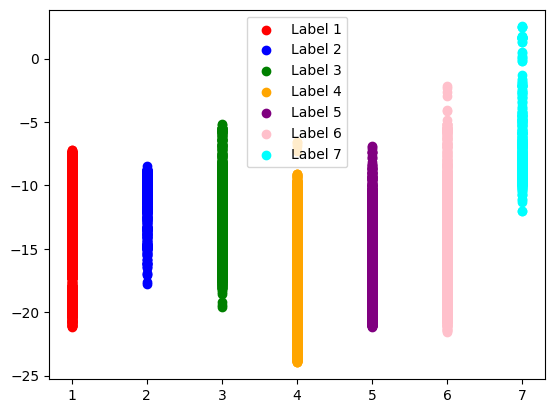

In [49]:
# Define un diccionario de etiquetas y colores
label_colors = {1.0: "red", 2.0: "blue", 3.0: "green", 4.0: "orange", 5.0: "purple", 6.0: "pink", 7.0: "cyan"}

# Itera a través de las etiquetas y colores
for label, color in label_colors.items():
    data = dataset[dataset["label"] == label]
    plt.scatter(data.iloc[:, 0].values, data.iloc[:, 1].values, color=color, label=f"Label {int(label)}")

# Muestra la leyenda de las etiquetas
plt.legend()

# Muestra la gráfica de dispersión
plt.show()

## Correlation analysis

We will now look at the correlation between the variables in the dataset. We want to identify the variables that have a high correlation with the target variable (higher than 95%) and remove them later from the dataset.

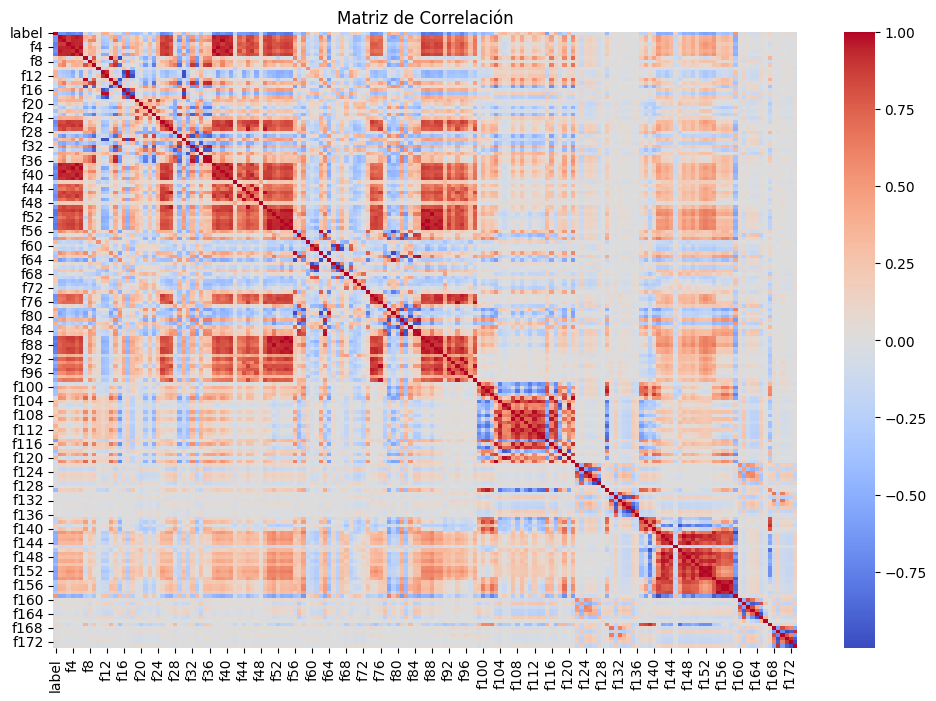

Variables altamente correlacionadas:
{'f65', 'f62', 'f84', 'f135', 'f46', 'f81', 'f108', 'f39', 'f40', 'f116', 'f64', 'f95', 'f156', 'f94', 'f109', 'f15', 'f173', 'f6', 'f120', 'f121', 'f165', 'f88', 'f2', 'f49', 'f102', 'f18', 'f149', 'f129', 'f66', 'f147', 'f152', 'f153', 'f92', 'f38', 'f45', 'f146', 'f158', 'f36', 'f54', 'f98', 'f5', 'f37', 'f86', 'f35', 'f113', 'f127', 'f32', 'f96', 'f112', 'f17', 'f47', 'f79', 'f16', 'f148', 'f171', 'f89', 'f55', 'f133', 'f13', 'f30', 'f90', 'f154', 'f41', 'f159', 'f67', 'f85', 'f117', 'f157', 'f53', 'f114', 'f87', 'f111'}


In [50]:
# Calcula la matriz de correlación
correlation_matrix = x_data.corr()

# Visualiza la matriz de correlación usando un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Encuentra las variables con alta correlación (mayor al 95%)
highly_correlated_vars = set()  # Crear un conjunto vacío para almacenar las variables altamente correlacionadas

# Bucle para encontrar las variables altamente correlacionadas
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.95:
            colname = correlation_matrix.columns[i]
            highly_correlated_vars.add(colname)

# Imprime las variables altamente correlacionadas
print("Variables altamente correlacionadas:")
print(highly_correlated_vars)


### Remove the variables with high correlation

Afet we remote the variables we scale the data. Then train the test split.

In [59]:
# Elimina las variables altamente correlacionadas del conjunto de datos
x_data_cleaned = x_data.drop(columns=highly_correlated_vars)

sc = StandardScaler()
sc.fit(x_data_cleaned)
scaled_X = sc.transform(x_data_cleaned)

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y_data, test_size = 0.25, random_state = 0)

In [61]:
print(X_train)

        label      f1      f3      f4        f7       f8       f9       f10  \
96572       3 -10.709 -13.021 -14.332  2.312600  -7.8409  -5.5283 -0.057988   
114241      3 -12.497 -13.194 -16.548  0.697270  -9.1910  -8.4937 -0.086313   
170476      4 -20.149 -18.202 -23.269 -1.947600  -9.2909 -11.2390 -0.563200   
142301      4 -18.589 -17.655 -20.982 -0.933750  -8.6351  -9.5688 -0.599040   
269521      6 -16.775 -16.583 -22.533 -0.192190 -10.4660 -10.6580 -0.677200   
...       ...     ...     ...     ...       ...      ...      ...       ...   
122579      4 -15.867 -16.065 -20.296  0.198640  -9.3404  -9.1418 -1.048800   
304137      6 -16.091 -16.184 -19.262  0.092722  -8.0128  -7.9201 -0.932680   
152315      4 -17.814 -16.137 -18.998 -1.677200 -10.1390 -11.8160 -0.864400   
117952      3 -12.678 -13.296 -16.713  0.617920  -9.7798  -9.1618 -0.398520   
305711      6 -16.423 -17.278 -20.473  0.855720  -9.7900  -8.9343 -0.595530   

            f11      f12  ...     f161     f162    

In [62]:
print(y_train)

96572     0.31623
114241    1.00000
170476    1.00000
142301    1.00000
269521    1.00000
           ...   
122579    1.00000
304137    0.00000
152315    1.00000
117952    1.00000
305711    1.00000
Name: f174, Length: 244375, dtype: float64


In [64]:
print(X_train)

[[-0.66341883  1.26602853  0.72893156 ... -0.81540329  0.41178015
   1.81301794]
 [-0.66341883  0.75535726  0.67594118 ...  0.75869742 -0.4522088
  -0.83998005]
 [-0.04021648 -1.43013301 -0.85802299 ...  0.75869742 -0.4522088
  -0.83998005]
 ...
 [-0.04021648 -0.76323288 -0.22550781 ...  0.75869742 -0.4522088
  -0.83998005]
 [-0.66341883  0.70366179  0.6446983  ...  0.75869742 -0.4522088
  -0.83998005]
 [ 1.20618823 -0.36594891 -0.57499925 ...  0.75869742 -0.4522088
  -0.83998005]]


# SVM training with a polynomial kernel

In [66]:
from sklearn.svm import SVC

y_train = y_train.astype(int)
y_test = y_test.astype(int)

classifier = SVC(kernel = 'poly', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='poly', random_state=0)

In [68]:
y_pred = classifier.predict(X_test)

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[    0     8     1]
 [    0 28965  3199]
 [    0  1792 47494]]


0.9386194281785929

# SVM training with a RBF kernel

In [70]:
classifier2 = SVC(kernel = 'rbf', random_state = 0)
classifier2.fit(X_train, y_train)

SVC(random_state=0)

In [71]:
y_pred2 = classifier2.predict(X_test)

In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred2)
print(cm)
accuracy_score(y_test, y_pred2)

[[    0     8     1]
 [    0 28794  3370]
 [    0  1681 47605]]


0.937882861316736

# Models evaluation



Basándonos en los resultados de los dos modelos SVM con diferentes kernels (polinomial y RBF) y las métricas de evaluación proporcionadas, podemos concluir que ambos modelos muestran un rendimiento sólido en términos de precisión.

El modelo SVM con kernel polinomial logra una precisión general del 93.86%, mientras que el modelo con kernel RBF alcanza una precisión del 93.79%. Esto significa que ambos modelos clasifican correctamente aproximadamente el 94% de las muestras en el conjunto de prueba.

Sin embargo, ambas variantes de SVM muestran dificultades al clasificar la clase 1 (etiqueta 1), con un número de falsos negativos y un falso positivo. Esto sugiere que esta clase específica puede ser más desafiante de distinguir para ambos modelos y podría requerir un enfoque adicional para mejorar su clasificación.

En resumen, los dos modelos SVM son capaces de lograr una alta precisión en la clasificación de las clases en este conjunto de datos. El modelo de kernel polinomial muestra un rendimiento ligeramente superior en términos de precisión, pero ambos son opciones sólidas.